# Homework Assignment 1: Boston Housing Dataset Analysis

**Dataset:** HousingData.csv - Boston Housing Dataset

## Dataset Description
- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to five Boston employment centres
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per $10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk − 0.63)² where Bk is the proportion of blacks by town
- **LSTAT**: lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000's

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/data.csv')

---

# Problem 1: Linear Regression Analysis

## 1(a): Missing Data Analysis (0.25 pt.)

**Task:** Look closely at the database. Some data are missing. What would you recommend to do with this? Explain. Fill in these values.

**Key considerations:**
- Identify which variables have missing values
- Assess the percentage and pattern of missing data
- Choose an appropriate imputation strategy
- Implement the solution


Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Total number of rows with missing values: 0

Percentage of rows with missing values: 0.00%


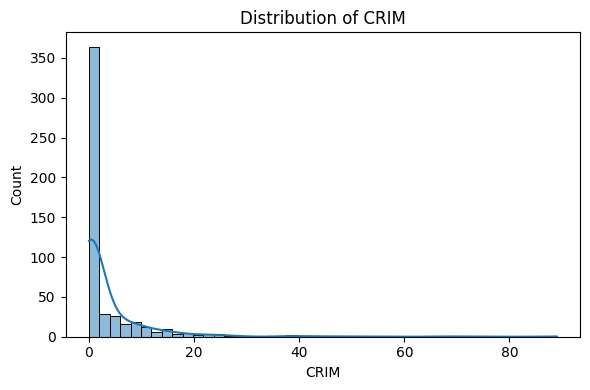

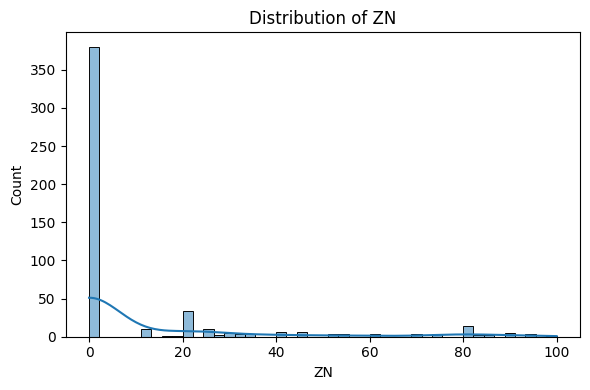

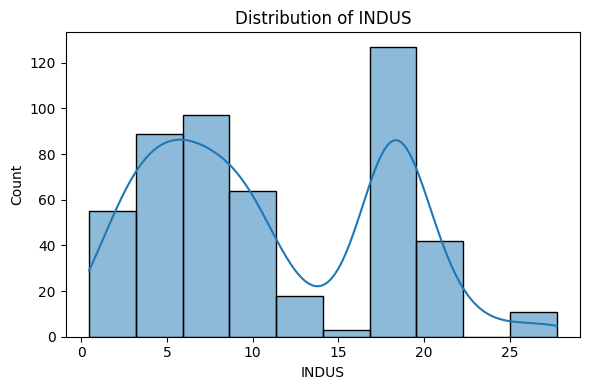

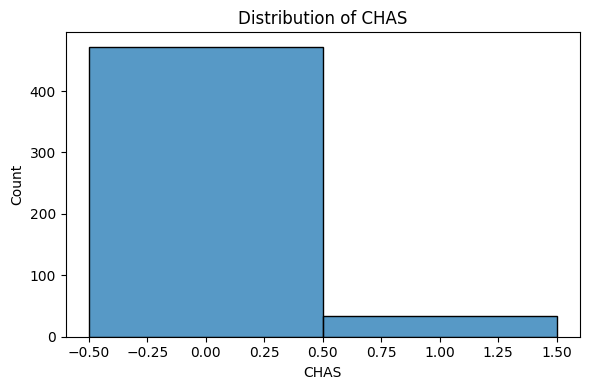

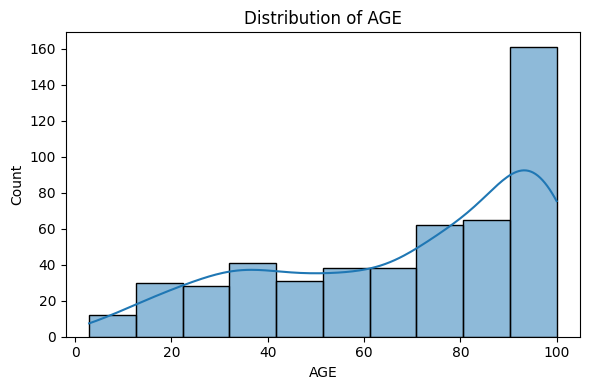

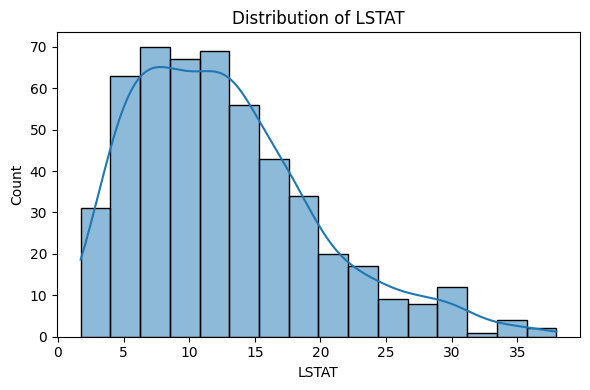


Missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# 1(a) Handle missing values
# Your analysis and imputation code here

# Let's start from missing values:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# We have missing values in: Criminal Rate, Proportion of residential zones, proportion of industial zones, information about river connection, old buildings, and lower status of the population.
# What is total number of rows with missing values?
total_missing_rows = df.isnull().any(axis=1).sum()
print("\nTotal number of rows with missing values:", total_missing_rows)

# It's 112
print("\nPercentage of rows with missing values: {:.2f}%".format((total_missing_rows / len(df)) * 100))

affected_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

for col in affected_cols:
    plt.figure(figsize=(6, 4))
    if col == 'CHAS':
        sns.histplot(data=df, x=col, discrete=True)
    else:
        sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
df['ZN'].fillna(df['ZN'].median(), inplace=True)
df['INDUS'].fillna(df['INDUS'].median(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

missing_values_after = df.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after)

## 1(b): Hypothesis Testing on NOX Variable (0.25 pt.)

**Task:** Construct linear regression model for MEDV taking other variables as explanatory. Test the hypothesis about significance of the variable NOX.

**What you need to do:**
1. Specify the hypotheses (H₀ and H₁)
2. Identify the test statistic to use
3. Determine the critical region for α = 0.05
4. Run the test and formulate conclusion

**Interpretation:** Does variable NOX significantly affect housing prices?

In [7]:
# 1(b) Full linear regression and test NOX significance
from statsmodels.formula.api import ols
from scipy import stats

# Build the full model
# Your regression code here
regression_formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'
model = ols(regression_formula, data=df).fit()
print(model.summary())

# Now let's run t-test to determine if NOX is significant
print("\n" + "="*60)
print("Hypothesis Test for NOX Coefficient")
print("="*60)

nox_coef = model.params['NOX']
nox_se = model.bse['NOX']
nox_t_stat = model.tvalues['NOX']
nox_p_value = model.pvalues['NOX']

print(f"NOX Coefficient: {nox_coef:.4f}")
print(f"Standard Error: {nox_se:.4f}")
print(f"t-statistic: {nox_t_stat:.4f}")
print(f"p-value: {nox_p_value:.6f}")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 23 Feb 2026   Prob (F-statistic):          3.75e-131
Time:                        16:41:15   Log-Likelihood:                -1507.7
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     492   BIC:                             3103.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9935      5.164      6.583      0.0

## 1(c): Variable Selection Using AIC (0.5 pt.)

**Task:** Select variables using AIC. Explain how the procedure works.

**For the final model:**
1. Present the output
2. Interpret the resulting coefficient estimates
3. Explain what the F-statistic shows
4. Interpret the F-statistic result

In [8]:
# 1(c) Stepwise variable selection using AIC
from scipy.stats import f

# List of all predictors
all_predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Start with full model
current_predictors = all_predictors.copy()
current_formula = 'MEDV ~ ' + ' + '.join(current_predictors)
current_model = ols(current_formula, data=df).fit()
current_aic = current_model.aic

print(f"Initial Model AIC: {current_aic:.2f}")
print(f"Variables: {len(current_predictors)}\n")

# Backward elimination
iteration = 0
while True:
    iteration += 1
    best_aic = current_aic
    best_predictor_to_remove = None
    
    for predictor in current_predictors:
        test_predictors = [p for p in current_predictors if p != predictor]
        test_formula = 'MEDV ~ ' + ' + '.join(test_predictors)
        test_model = ols(test_formula, data=df).fit()
        test_aic = test_model.aic
        
        if test_aic < best_aic:
            best_aic = test_aic
            best_predictor_to_remove = predictor
    
    if best_predictor_to_remove is None:
        break
    
    current_predictors.remove(best_predictor_to_remove)
    current_aic = best_aic
    print(f"Iteration {iteration}: Removed {best_predictor_to_remove}, AIC = {current_aic:.2f}")

# Fit final model
final_formula = 'MEDV ~ ' + ' + '.join(current_predictors)
final_model = ols(final_formula, data=df).fit()

print(f"\nFinal variables: {current_predictors}")
print(f"\n{final_model.summary()}")

print("\n" + "="*70)
print("Model Statistics")
print("="*70)
print(f"R^2: {final_model.rsquared:.4f}")
print(f"Adjusted R^2: {final_model.rsquared_adj:.4f}")
print(f"F-statistic: {final_model.fvalue:.2f}")
print(f"F-test p-value: {final_model.f_pvalue:.6f}")

Initial Model AIC: 3043.50
Variables: 13

Iteration 1: Removed INDUS, AIC = 3041.91
Iteration 2: Removed AGE, AIC = 3040.45

Final variables: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 23 Feb 2026   Prob (F-statistic):          4.86e-133
Time:                        16:41:37   Log-Likelihood:                -1508.2
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     494   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                           

## 1(d): Testing PTRATIO Effect (0.25 pt.)

**Task:** Test whether the effect of the independent variable PTRATIO on MEDV is negative (c.p.).

**What you need to do:**
1. State your intuitive expectation (Should pupil-teacher ratio negatively affect house prices?)
   Yes, we expect a negative relationship. Higher pupil-teacher ratios may indicate absense or lower quality of education, which can reduce the attractiveness of a neighborhood and thus lower housing prices.
2. Formulate the hypotheses (one-sided test)
3. Test them using the appropriate model
4. Interpret the result

In [ ]:
# 1(d) Test PTRATIO negative effect
# Use the AIC-selected model from 1(c)

print("\n" + "="*60)
print("Hypothesis Test for PTRATIO Coefficient")
print("="*60)

ptratio_coef = model.params['PTRATIO']
ptratio_se = model.bse['PTRATIO']
ptratio_t_stat = model.tvalues['PTRATIO']
ptratio_p_value = model.pvalues['PTRATIO']

print(f"PTRATIO Coefficient: {ptratio_coef:.4f}")
print(f"Standard Error: {ptratio_se:.4f}")
print(f"t-statistic: {ptratio_t_stat:.4f}")
print(f"p-value: {ptratio_p_value:.6f}")


Hypothesis Test for PTRATIO Coefficient
PTRATIO Coefficient: -0.9305
Standard Error: 0.1332
t-statistic: -6.9858
p-value: 0.000000


## 1(e): Interpreting CHAS and the Dummy Variable Problem (0.25 pt.)

**Task:** Interpret the coefficient of variable CHAS. Explain why we do not include into the model variable NCR = 1 if tract does not bound river; 0 otherwise.

**Key concept:** The dummy variable trap / multicollinearity issue with perfectly collinear dummies

## 1(f): Joint Significance Test for DIS and RAD (0.5 pt.)

**Task:** Test variables DIS and RAD for joint significance.

**What you need to do:**
1. State: What test to use? 
2. Write down the hypotheses
3. Define the test statistic
4. Critical region for α = 0.05
5. Run the test
6. Formulate conclusions

In [11]:
unrestricted_model = final_model

restricted_predictors = [p for p in current_predictors if p not in ['DIS', 'RAD']]
restricted_formula = 'MEDV ~ ' + ' + '.join(restricted_predictors)
restricted_model = ols(restricted_formula, data=df).fit()

# Extract necessary statistics
n = unrestricted_model.nobs  
k = unrestricted_model.df_model + 1
q = 2 

SSR_unrestricted = unrestricted_model.ssr
SSR_restricted = restricted_model.ssr

R2_unrestricted = unrestricted_model.rsquared
R2_restricted = restricted_model.rsquared

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / (SSR_unrestricted / (n - k))

print(f"\nNumber of observations (n): {n}")
print(f"Parameters in unrestricted model (k): {k}")
print(f"Number of restrictions (q): {q}")
print(f"Degrees of freedom: numerator = {q}, denominator = {n - k}")
print("-" * 70)
from scipy.stats import f as f_dist

alpha = 0.05
critical_value = f_dist.ppf(1 - alpha, q, n - k)
p_value = 1 - f_dist.cdf(F_statistic, q, n - k)

print(f"Significance level: α = {alpha}")
print(f"Critical value: F_{{{q}, {n-k}}} = {critical_value:.4f}")
print(f"Decision rule: Reject H₀ if F > {critical_value:.4f}")

print("-" * 70)
print("RESULTS:")
print(f"SSR (Unrestricted): {SSR_unrestricted:.4f}")
print(f"SSR (Restricted): {SSR_restricted:.4f}")
print(f"R^2 (Unrestricted): {R2_unrestricted:.4f}")
print(f"R^2 (Restricted): {R2_restricted:.4f}")
print(f"\nCalculated F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value:.6f}")


Number of observations (n): 506.0
Parameters in unrestricted model (k): 12.0
Number of restrictions (q): 2
Degrees of freedom: numerator = 2, denominator = 494.0
----------------------------------------------------------------------
Significance level: α = 0.05
Critical value: F_{2, 494.0} = 3.0140
Decision rule: Reject H₀ if F > 3.0140
----------------------------------------------------------------------
RESULTS:
SSR (Unrestricted): 11499.0393
SSR (Restricted): 13207.4981
R^2 (Unrestricted): 0.7308
R^2 (Restricted): 0.6908

Calculated F-statistic: 36.6978
p-value: 0.000000


## 1(g): Testing CRIM Effect Heterogeneity (0.5 pt.)

**Task:** Test whether the effect of CRIM on the expected value of MEDV is the same for tracts near Charles River and others.
In other words - does crime rate (CRIM) affect house prices differently depending on location near the river (CHAS)?

**Approach:** Interaction model between CRIM and CHAS
- Run the corresponding model
- Test whether the interaction term is significant
- Interpret the result

In [ ]:
# 1(g) CRIM effect heterogeneity with CHAS interaction
# Test if CRIM effect differs for tracts near/far from Charles River

df['CRIM_CHAS'] = df['CRIM'] * df['CHAS']

interaction_predictors = current_predictors.copy()
# Make sure CRIM and CHAS are included
interaction_predictors.append('CRIM')
interaction_predictors.append('CHAS')

# Build formula with interaction
interaction_formula = 'MEDV ~ ' + ' + '.join(interaction_predictors) + ' + CRIM_CHAS'
interaction_model = ols(interaction_formula, data=df).fit()

print(interaction_model.summary())

# Extract interaction coefficient statistics
interaction_coef = interaction_model.params['CRIM_CHAS']
interaction_se = interaction_model.bse['CRIM_CHAS']
interaction_t = interaction_model.tvalues['CRIM_CHAS']
interaction_p = interaction_model.pvalues['CRIM_CHAS']

print("\n" + "-"*70)
print("Test Results:")
print("-"*70)
print(f"Interaction coefficient (beta_3): {interaction_coef:.4f}")
print(f"Standard error: {interaction_se:.4f}")
print(f"t-statistic: {interaction_t:.4f}")
print(f"p-value: {interaction_p:.6f}")

# Critical value for two-sided test
from scipy.stats import t as t_dist
df_residual = interaction_model.df_resid
critical_t = t_dist.ppf(0.975, df_residual)  # 0.975 for two-sided 0.05
print(f"\nCritical value (t_0.025, {df_residual} df): +-{critical_t:.4f}")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     114.7
Date:                Sun, 22 Feb 2026   Prob (F-statistic):          3.45e-134
Time:                        09:23:52   Log-Likelihood:                -1503.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     493   BIC:                             3087.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3159      5.138      7.068      0.0

---

# Problem 2: Log-Linear Regression Analysis

**Model:** Log-linear model for log(MEDV) using other variables as independent variables

## 2(a): Log-Linear Model with AIC Selection (0.25 pt.)

**Task:** Construct log-linear model for log(MEDV) taking other variables as independent variables. Select variables using AIC.

In [27]:
# 2(a) Log-linear model with AIC selection

# List of candidate predictors (same as before)
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Start with full log-linear model
current_predictors_log = predictors.copy()
current_formula_log = 'log_MEDV ~ ' + ' + '.join(current_predictors_log)
current_model_log = ols(current_formula_log, data=df).fit()
current_aic_log = current_model_log.aic

print(f"Initial log-linear model AIC: {current_aic_log:.2f}")
print(f"Variables: {len(current_predictors_log)}\n")

# Backward elimination using AIC
iteration = 0
while True:
    iteration += 1
    best_aic = current_aic_log
    best_remove = None
    for predictor in current_predictors_log:
        test_preds = [p for p in current_predictors_log if p != predictor]
        test_formula = 'log_MEDV ~ ' + ' + '.join(test_preds)
        test_model = ols(test_formula, data=df).fit()
        if test_model.aic < best_aic:
            best_aic = test_model.aic
            best_remove = predictor
    if best_remove is None:
        break
    current_predictors_log.remove(best_remove)
    current_aic_log = best_aic
    print(f"Iteration {iteration}: Removed {best_remove}, AIC = {current_aic_log:.2f}")

# Fit final log-linear model
final_formula_log = 'log_MEDV ~ ' + ' + '.join(current_predictors_log)
final_model_log = ols(final_formula_log, data=df).fit()

print(final_model_log.summary())


Initial log-linear model AIC: -204.41
Variables: 13

Iteration 1: Removed INDUS, AIC = -206.28
Iteration 2: Removed AGE, AIC = -208.09
                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     157.4
Date:                Sun, 22 Feb 2026   Prob (F-statistic):          1.27e-153
Time:                        10:36:36   Log-Likelihood:                 116.05
No. Observations:                 506   AIC:                            -208.1
Df Residuals:                     494   BIC:                            -157.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

## 2(b): Coefficient Interpretation (0.5 pt.)

**Task:** Interpret the estimated values of coefficients. Do they correspond to your intuition?

**Important:** In log-linear models, coefficients represent elasticities or percentage changes. Interpret each significant variable accordingly.

In [ ]:
# 2(b) Interpret log-linear model coefficients
# Compare with intuitive expectations

## 2(c): Testing Effect Magnitudes (0.5 pt.)

**Task:** Test whether the expected percentage decrease of MEDV caused by one point increase of PTRATIO is greater than that caused by one point increase of CRIM (c.p.).

**What you need to do:**
1. Formulate the hypotheses carefully (be careful with signs!):
2. Explain which test to use and how it works
3. Run the test
4. Formulate conclusions

**Key insight:** In a log-linear model, the coefficient directly represents the percentage change.

In [ ]:
# We will use the final log-linear model from 2(a)
# Extract coefficients, variances and covariance from the model
beta_ptratio = final_model_log.params['PTRATIO']
beta_crim = final_model_log.params['CRIM']

var_ptratio = final_model_log.cov_params().loc['PTRATIO','PTRATIO']
var_crim = final_model_log.cov_params().loc['CRIM','CRIM']
cov_pr_cr = final_model_log.cov_params().loc['PTRATIO','CRIM']

# Calculate test statistic for difference (beta_ptratio - beta_crim)
num = beta_ptratio - beta_crim
den = (var_ptratio + var_crim - 2*cov_pr_cr)**0.5
t_stat = num / den

df_resid = final_model_log.df_resid

from scipy.stats import t as t_dist
p_value = t_dist.cdf(t_stat, df_resid)


print("\nVariance & covariance:")
print(f"Var(PTRATIO): {var_ptratio:.6f}")
print(f"Var(CRIM):    {var_crim:.6f}")
print(f"Cov(PTRATIO, CRIM): {cov_pr_cr:.6f}")

print("\nTest statistic:")
print(f"t = {t_stat:.4f} with {df_resid} df")
print(f"one-sided p-value = {p_value:.6f}")

alpha = 0.05
critical = t_dist.ppf(alpha, df_resid)
print(f"Critical value (lower {alpha}): {critical:.4f}")



Variance & covariance:
Var(PTRATIO): 0.000028
Var(CRIM):    0.000002
Cov(PTRATIO, CRIM): 0.000000

Test statistic:
t = -4.9940 with 494.0 df
one-sided p-value = 0.000000
Critical value (lower 0.05): -1.6479


## 2(d): Model Comparison Using Adjusted R² (0.25 pt.)

**Task:** Can we compare linear and log-linear model using adjusted R² coefficients? Why? Explain.

**Key concepts:**
- R² measures proportion of variance explained
- log-linear model has different dependent variable (log-transformation)
- Adjusted R² penalizes for number of regressors
- Discuss comparability of models with different dependent variables

In [ ]:
# 2(d) Comparison of models and R² interpretation
# Extract R² and Adjusted R² from both linear and log-linear models